In [77]:
import pandas as pd
import numpy as np
import statistics as st

In [78]:
df = pd.read_csv("dow_jones_index.data")

In [79]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [166]:
def confidence_interval(df_col):
    """
    Takes in a dataframe column and outputs the confidence interval of the array
    
    returns a list of dictionaries with different standard deviations labeled
    """
    
    #easier to work with if it's an array
    pcp = np.array(df_col)
    
    #take the mean
    u = pcp.mean()
    
    #find the sum of the difference of squares, e
    e=0
    for x in pcp:
        e+=(x-u)**2
    #take the square root of the variance, e
    std = (e/len(pcp))**(1/2)
    
    #make create standard deviations away from the mean
    u_std_1 = u+std
    u_std_2 = u_std_1+std
    u_std_3 = u_std_2+std
    nu_std_1 = u-std
    nu_std_2 = u-std-std
    nu_std_3 = u-std-std-std
    return [{"std":std},{"-z3":nu_std_3},{"-z2":nu_std_2},{"-z":nu_std_1},{"u":u},{"z":u_std_1},{"z2":u_std_2},{"z3":u_std_3}]

In [167]:
confidence_interval(df['volume'])

[{'std': 158332428.73595884},
 {'-z3': -357449484.80120987},
 {'-z2': -199117056.06525102},
 {'-z': -40784627.329292178},
 {'u': 117547801.40666667},
 {'z': 275880230.14262551},
 {'z2': 434212658.87858438},
 {'z3': 592545087.6145432}]

In [230]:
def out_params(df_col):
    '''
    out_params takes in a dataframe column, pulls the standard deviations from it with confidence_interval, and returns 
    
    df_col = df
    '''
    ci = confidence_interval(df_col)
    val = []
    for i in ci[4:8]:
        val.append(list(i.values())[0])
    
    

In [239]:
out_det(df['volume'])

[117547801.40666667, 275880230.14262551, 434212658.87858438, 592545087.6145432]

In [282]:
colors = np.where(df['volume']>confidence_interval(df['volume'])[7]['z3'],'r','g')

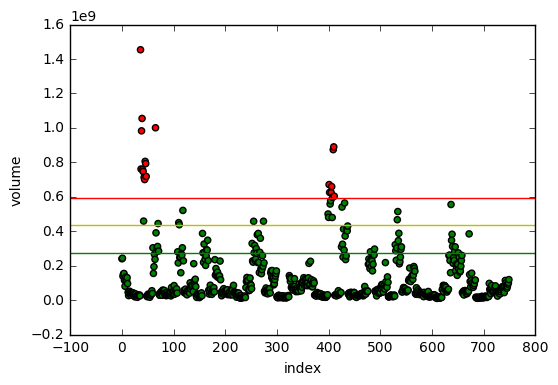

In [283]:
df.reset_index().plot(x="index",y="volume", kind='scatter',c=colors)
plt.axhline(y=confidence_interval(df['volume'])[7]['z3'], color='r', linestyle='-')
plt.axhline(y=confidence_interval(df['volume'])[6]['z2'], color='y', linestyle='-')
plt.axhline(y=confidence_interval(df['volume'])[5]['z'], color='g', linestyle='-')
plt.show()

In [254]:
def sort_stds(df_col):
    """
    sort_stds takes in a numerical dataframe column and sorts its values 
    by where they fall between different standard deviation ranges
    """
    vals = np.array(df_col)
    
    #set the std values
    z =confidence_interval(df_col)[5]['z']
    z2 = confidence_interval(df_col)[6]['z2']
    z3 = confidence_interval(df_col)[7]['z3']

    # opens arrays for normal values, and each degree of outlier
    z_vals = []
    outliers_1 = []
    outliers_2 = []
    outliers_3 = []
    
    for i in vals:
        if i > z3:
            outliers_3.append(i)
        elif i > z2:
            outliers_2.append(i)
        elif i > z:
            outliers_1.append(i)
        else:
            z_vals.append(i)
    
    
    
    plt.axhline(y=confidence_interval(df['volume'])[7]['z3'], color='r', linestyle='-')
    plt.axhline(y=confidence_interval(df['volume'])[6]['z2'], color='y', linestyle='-')
    plt.axhline(y=confidence_interval(df['volume'])[5]['z'], color='g', linestyle='-')
    plt.show()

In [255]:
sort_stds(df['volume'])

[20, 17, 44, 669]

In [288]:
df_AA = df[(df['stock']=='AA')]

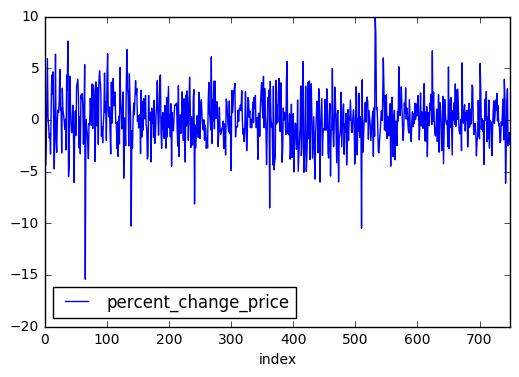

In [296]:
df.reset_index().plot(x="index",y="percent_change_price")
plt.figure(figsize=(20,16))
plt.show()

In [ ]:
df_AA['high']==